## Worshop 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.2'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [4]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('adult.csv.gz', na_values='?') # можно загрузить из файла или URL
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [5]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [6]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [7]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


4) Какие признаки имеют пропуски?

In [8]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Возможно, потому что у людей нет официального трудоустройства

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [21]:
print(df['workclass'].unique())
df['workclass'].value_counts(dropna=False)

[nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
NaN,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


7) Какой средний возраст женщин и мужчин?

In [20]:
df[["sex", "age"]].groupby("sex").mean()

,age
sex,
Female,36.858230
Male,39.433547


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

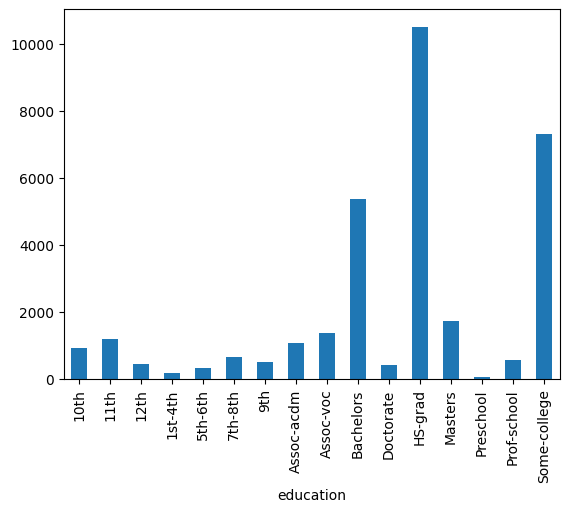

In [11]:
df.groupby('education').count()['age'].plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [12]:
print(df[df['income'] == '>50K']['age'].mean())
print(df[df['income'] == '<=50K']['age'].mean())
print(df[df['income'] == '>50K']['age'].std())
print(df[df['income'] == '<=50K']['age'].std())


44.24984058155847
36.78373786407767
10.519027719851769
14.020088490824829


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

Ответ: нет

In [13]:
df[df['income'] == '>50K']['education'].unique() # неправда

array(['Doctorate', 'Some-college', 'Prof-school', 'Bachelors', 'Masters',
       '11th', 'Assoc-acdm', '10th', 'HS-grad', 'Assoc-voc', '9th',
       '7th-8th', '5th-6th', '12th', '1st-4th'], dtype=object)

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

Ответ: женатые зарабатывают больше

In [22]:
tmp1 =df.loc[(df['income'] == '>50K') & (df['marital.status'].str.startswith('Married'))].shape[0]
tmp2 =df.loc[(df['income'] == '>50K') & (~df['marital.status'].str.startswith('Married'))].shape[0]
tmp1/tmp2

6.095927601809954

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [15]:
out = pd.DataFrame()
out['many'] = df[df['income'] == '>50K'][['hours.per.week', 'native.country']].groupby('native.country').mean()
out['little'] = df[df['income'] == '<=50K'][['hours.per.week', 'native.country']].groupby('native.country').mean()
out

,many,little
native.country,,
Cambodia,40.000000,41.416667
Canada,45.641026,37.914634
China,38.900000,37.381818
Columbia,50.000000,38.684211
Cuba,42.440000,37.985714
Dominican-Republic,47.000000,42.338235
Ecuador,48.750000,38.041667
El-Salvador,45.000000,36.030928
England,44.533333,40.483333


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [32]:
import numpy as np
df['passiveIncome'] = abs(df['capital.gain'] - df['capital.loss'])
df['passiveIncome'] = np.round(np.log1p(df['passiveIncome']))
pd.pivot_table(df, values='passiveIncome', index='education', aggfunc='count', fill_value=0)


,passiveIncome
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [46]:
wSalary = df[(df['sex'] == 'Female') & (df['income'] == '>50K')].groupby('native.country').size()
wSize = df[df['sex'] == 'Female'].groupby('native.country').size()
(wSalary/wSize).sort_values(ascending=False)

,0
native.country,
Yugoslavia,0.333333
Taiwan,0.266667
France,0.250000
Japan,0.250000
Iran,0.250000
China,0.238095
Italy,0.238095
Canada,0.230769
Scotland,0.200000


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [48]:
import random
df['magicSalary'] = df['income'].apply(lambda x: random.randrange(50) if x == '>50K' else random.randrange(51, 200))
df['salaryInHour'] = df['magicSalary']/df['hours.per.week']
df.groupby('education')['salaryInHour'].mean()

,salaryInHour
education,
10th,4.350234
11th,4.870670
12th,3.951224
1st-4th,3.790841
5th-6th,3.630324
7th-8th,4.144335
9th,3.987547
Assoc-acdm,3.341654
Assoc-voc,2.978400
